In [36]:
from tqdm import tqdm
from PIL import Image
from skimage.io import imread

import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

## Generate a 2d Gaussian

In [37]:
def makeGaussian(size, fwhm = 3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

In [87]:
data = makeGaussian(256, fwhm=128)
data = np.array(data, dtype=np.float32)
print(data.shape)
print(data.dtype)

(256, 256)
float32


(-0.5, 255.5, 255.5, -0.5)

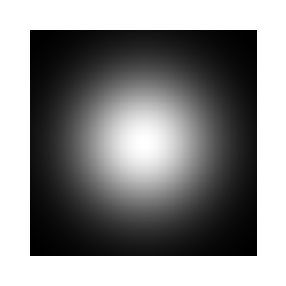

In [88]:
plt.figure(figsize=(1,1), dpi=300)
plt.imshow(data, cmap='gray')
plt.axis("off")

## PIL testing

### Use PIL to write as a tiff

In [89]:
img_PIL = Image.fromarray(data,mode='F')
img_PIL.save('img_PIL.tiff')

### Reload tiff

In [90]:
img_PIL_re = imread('img_PIL.tiff')
data_PIL = np.array(img_PIL)
print(data_PIL.shape)
print(data_PIL)

(256, 256)
[[0.00390625 0.0040785  0.00425691 ... 0.00444162 0.00425691 0.0040785 ]
 [0.0040785  0.00425835 0.00444463 ... 0.00463749 0.00444463 0.00425835]
 [0.00425691 0.00444463 0.00463906 ... 0.00484035 0.00463906 0.00444463]
 ...
 [0.00444162 0.00463749 0.00484035 ... 0.00505037 0.00484035 0.00463749]
 [0.00425691 0.00444463 0.00463906 ... 0.00484035 0.00463906 0.00444463]
 [0.0040785  0.00425835 0.00444463 ... 0.00463749 0.00444463 0.00425835]]


In [91]:
print(data) # the orginal data file

[[0.00390625 0.0040785  0.00425691 ... 0.00444162 0.00425691 0.0040785 ]
 [0.0040785  0.00425835 0.00444463 ... 0.00463749 0.00444463 0.00425835]
 [0.00425691 0.00444463 0.00463906 ... 0.00484035 0.00463906 0.00444463]
 ...
 [0.00444162 0.00463749 0.00484035 ... 0.00505037 0.00484035 0.00463749]
 [0.00425691 0.00444463 0.00463906 ... 0.00484035 0.00463906 0.00444463]
 [0.0040785  0.00425835 0.00444463 ... 0.00463749 0.00444463 0.00425835]]


### Draw tiff

(-0.5, 255.5, 255.5, -0.5)

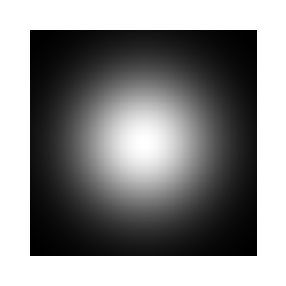

In [92]:
plt.figure(figsize=(1,1), dpi=300)
plt.imshow(data_PIL, cmap='gray')
plt.axis("off")

## pyplot testing

### save tiff

In [93]:
plt.imsave('img_plt.tiff', data)

### Reload tiff

In [94]:
img_plt = imread('img_plt.tiff')
data_plt = np.array(img_plt, dtype=np.float32)
print(data_plt.shape)

(256, 256, 4)


In [95]:
print(img_plt)

[[[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 ...

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 255.5, 255.5, -0.5)

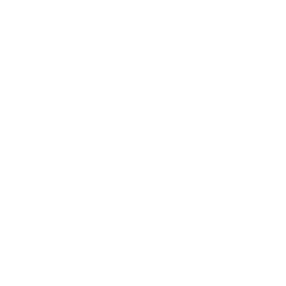

In [96]:
plt.figure(figsize=(1,1), dpi=300)
plt.imshow(data_plt, cmap='gray')
plt.axis("off")